# Taller 3: Segmentación

## Cargue la imagen de trabajo y visualícela.

In [1]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_baboon = cv2.imread(PATH +'baboon.png', cv2.IMREAD_GRAYSCALE)

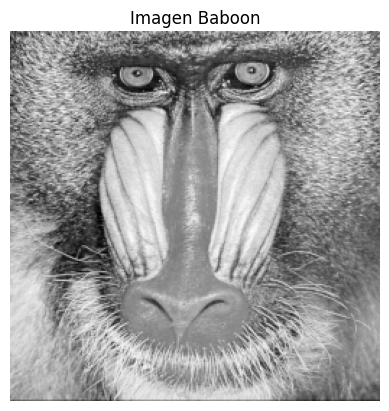

In [3]:
plt.imshow(imagen_baboon, cmap='gray')
plt.title('Imagen Baboon')
plt.axis('off')
plt.show()

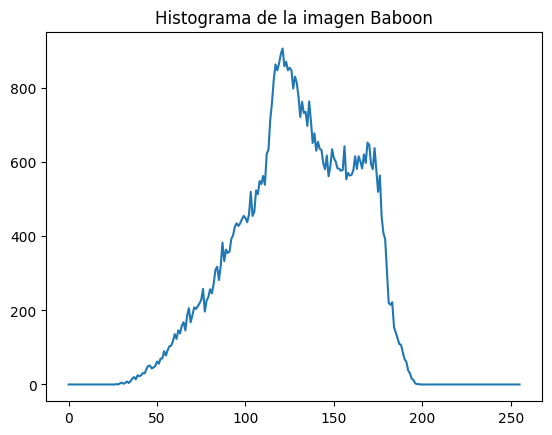

In [4]:
histogram_baboon = cv2.calcHist([imagen_baboon], [0], None, [256], [0, 256])
plt.plot(histogram_baboon)
plt.title('Histograma de la imagen Baboon')
plt.show()

## Aplique el algoritmo de K-means para segmentar por agrupación. Utilice un valor de K=3. Visualice los resultados.

In [8]:
#!pip install scikit-learn

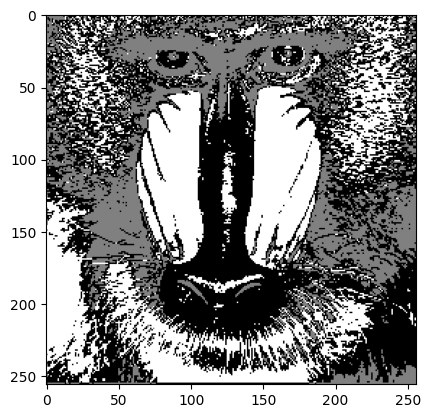

In [17]:
from sklearn.cluster import KMeans

N, M = imagen_baboon.shape

img_flat = imagen_baboon.reshape(N*M ,1)
model_kmeans = KMeans(n_clusters=3, random_state=29)
segmented_image = model_kmeans.fit(img_flat)

labels = model_kmeans.labels_

segmented_image = labels.reshape(N, M)

plt.imshow(segmented_image, cmap="gray")
plt.show()


## Utilice el método del codo para encontrar el valor óptimo de grupos en la imagen. Visualice los resultados ¿Cómo cambia la segmentación?

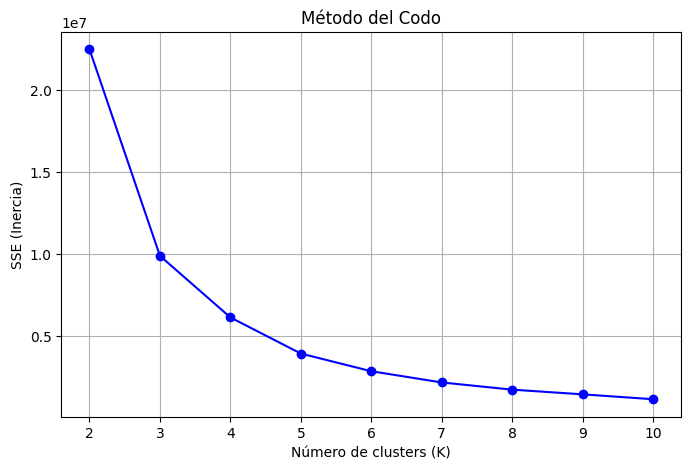

In [18]:
N, M = imagen_baboon.shape
img_flat = imagen_baboon.reshape(N * M, 1)

# Método del codo
k_values = range(2, 11)
sse = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=29)
    model.fit(img_flat)
    sse.append(model.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(list(k_values), sse, 'bo-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('SSE (Inercia)')
plt.title('Método del Codo')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

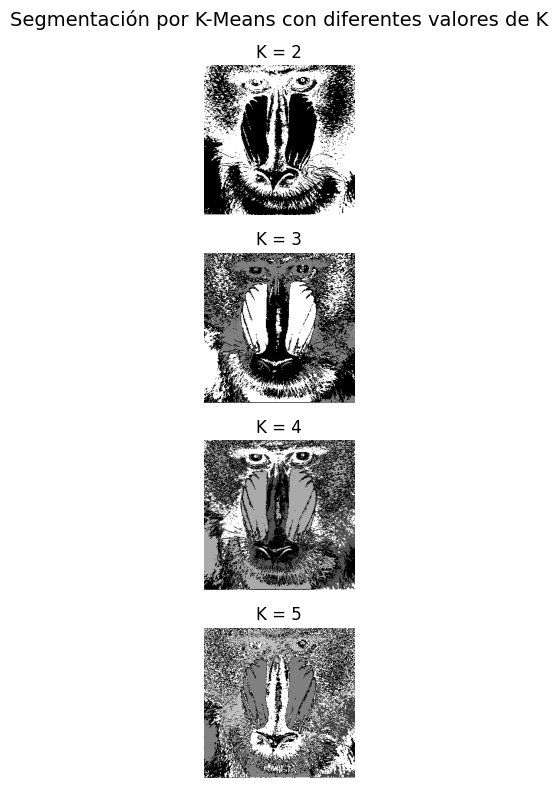

In [20]:
# Visualizar segmentación con diferentes valores de K
k_optimos = [2, 3, 4, 5]

fig, axs = plt.subplots(4, 1, figsize=(12, 8))

for i, k in enumerate(k_optimos):
    model = KMeans(n_clusters=k, random_state=29)
    model.fit(img_flat)
    labels = model.labels_.reshape(N, M)
    
    axs[i].imshow(labels, cmap='gray')
    axs[i].set_title(f'K = {k}')
    axs[i].axis('off')

plt.suptitle('Segmentación por K-Means con diferentes valores de K', fontsize=14)
plt.tight_layout()
plt.show()

Al aumentar el número de K, aumenta el número de valores posibles para la segmentación. Por ejemplo, con K=2 solo tenemos blanco y negro, mientras K=3 agrega una intesidad adicional. Esto permite obtener más detalles de la imagen en la segmentación y aumentar el contraste. Pero después de cierto valor de K, en el caso de nuestro ejercicio K=5, empeora la segmentación. Podríamos decir que con el análisis visual y el método del codo, el valor óptimo de K es 4.

## Aplique el algoritmo de súperpixeles SLIC. Utilice un valor de K=25. Visualice los resultados. ¿Cuántos súperpixeles se encontraron?